# Naive Bayes Classifier

In [1]:
from sklearn.datasets import make_blobs
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

In [2]:
# fit a probability distribution to a univariate data sample
# P(Xi|yi) - P(data|class) - likelihood
def uni_norm_dist(data):
    # estimate parameters
    mu = np.mean(data);
    sigma = np.std(data);
    # print(mu,sigma);
    # fit distribution
    dist = norm(mu, sigma);
    return dist
 
# calculate the independent conditional probability and predict
# P(yi | x1, x2, …, xn) = P(x1, x2, …, xn | yi) * P(yi) / P(x1, x2, …, xn) = P(class|data) = (P(data|class) * P(class)) / P(data)
#  the denominator is removed from the calculation P(x1, x2, …, xn) as it is a constant 
def predict(X, priory_, distX_y_,n,l):
    y = np.array([]);
    for j in range(l):
        prob = priory_[j]; # p(yi) = priori probability
        for i in range(n):
            prob*= distX_y_[str(i)+str(j)].pdf(X[i]); # prob = P(class|data) = P(yi|x1,x2,…,xn) = P(yi)*P(x1,x2,…,xn|yi)= posteriori probability
        y = np.append(y,prob);
    return np.argmax(y)

#Naive Bayesian Classifier
def NB_class(X,y):
    labels = np.unique(y);
    # print(X.shape)
    # sort data into classes
    Xy_={};
    for i in labels:
        Xy_[i] = X[y==i];
    # calculate priors
    priory_ = {}
    for i in labels:
        priory_[i] = len(Xy_[i])/len(X);
    # PDFs 
    distX_y_ = {};
    for i in range(X.shape[1]):
        for j in labels:
            distX_y_[str(i)+str(j)] = uni_norm_dist(Xy_[j][:,i]);
    # predicting samples
    pred = np.array([]);
    for i in range(X.shape[0]):
        pred = np.append(pred,predict(X[i,:],priory_,distX_y_,X.shape[1],len(labels)))
    return pred;

# plotting
def compare_plot(X,y,y_pred):
    plt.figure(figsize=(25,8));
    plt.subplot(1,2,1);
    cmap = plt.cm.Wistia
    normi = colors.BoundaryNorm(np.arange(np.min(y)-0.5, np.max(y)+1, 1), cmap.N)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap,norm=normi);
    plt.colorbar(ticks=np.unique(y));
    plt.title("True label plots");
    plt.subplot(1,2,2);
    cmap = plt.cm.summer
    normi = colors.BoundaryNorm(np.arange(np.min(y_pred)-0.5, np.max(y_pred)+1, 1), cmap.N)
    plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=cmap,norm=normi);
    plt.colorbar(ticks=np.unique(y_pred));
    plt.title("Predicted label plots");

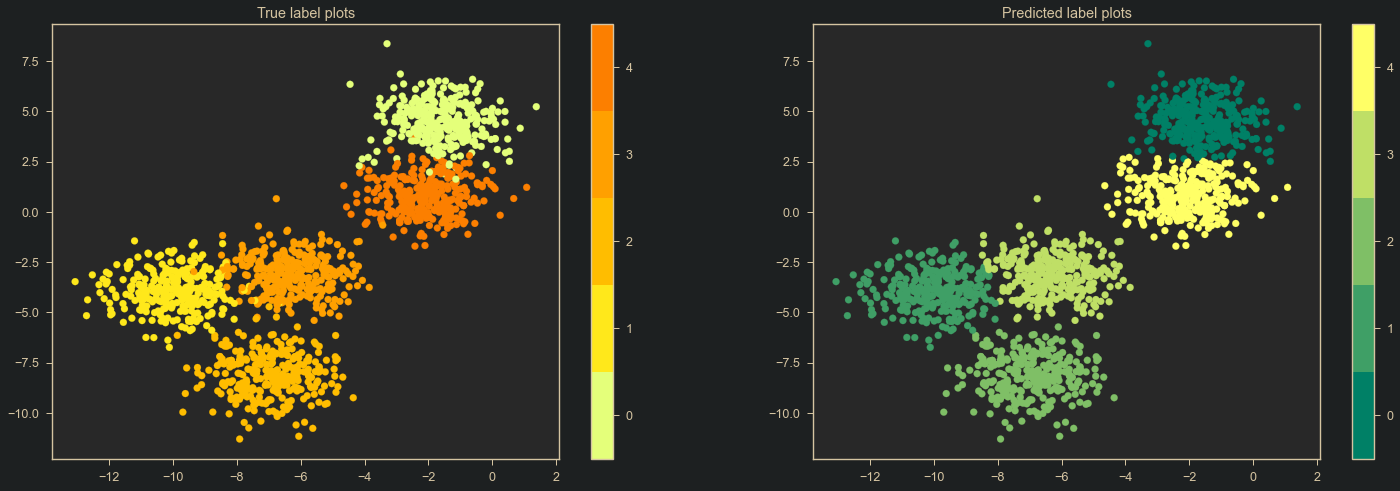

In [3]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1500, centers=5, n_features=2, random_state=1);
y_pred = NB_class(X,y);
# print(X.shape,y.shape,y_pred.shape)
compare_plot(X,y,y_pred);

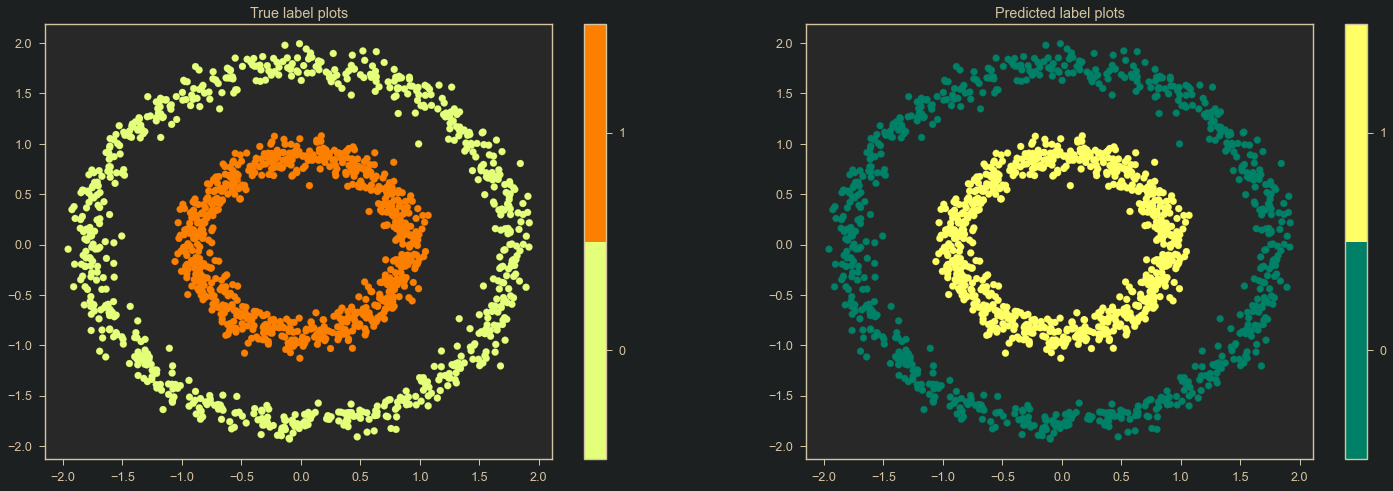

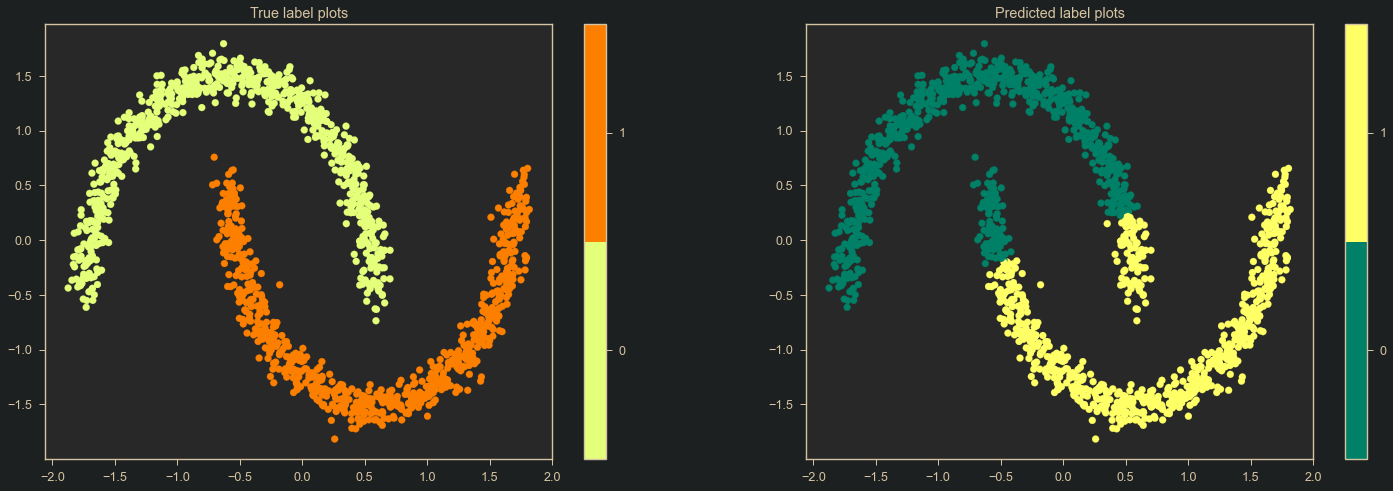

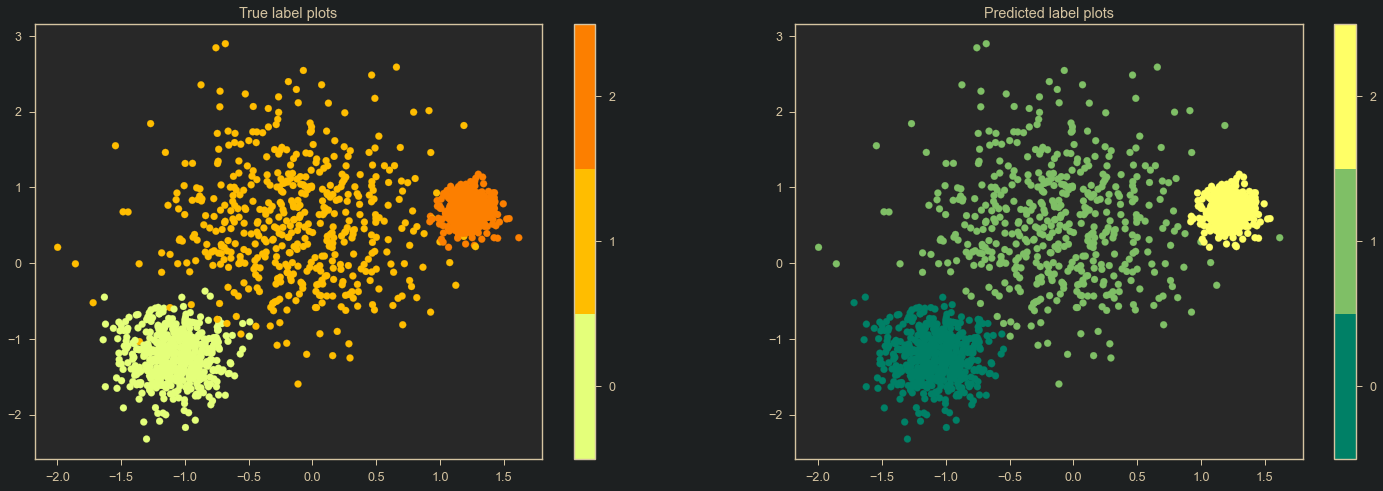

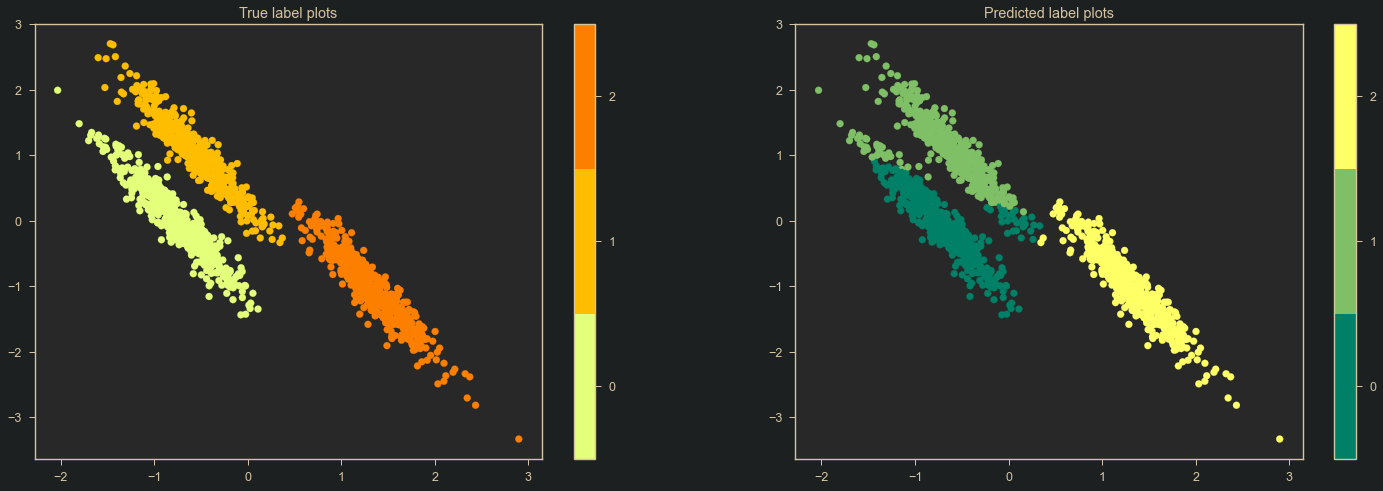

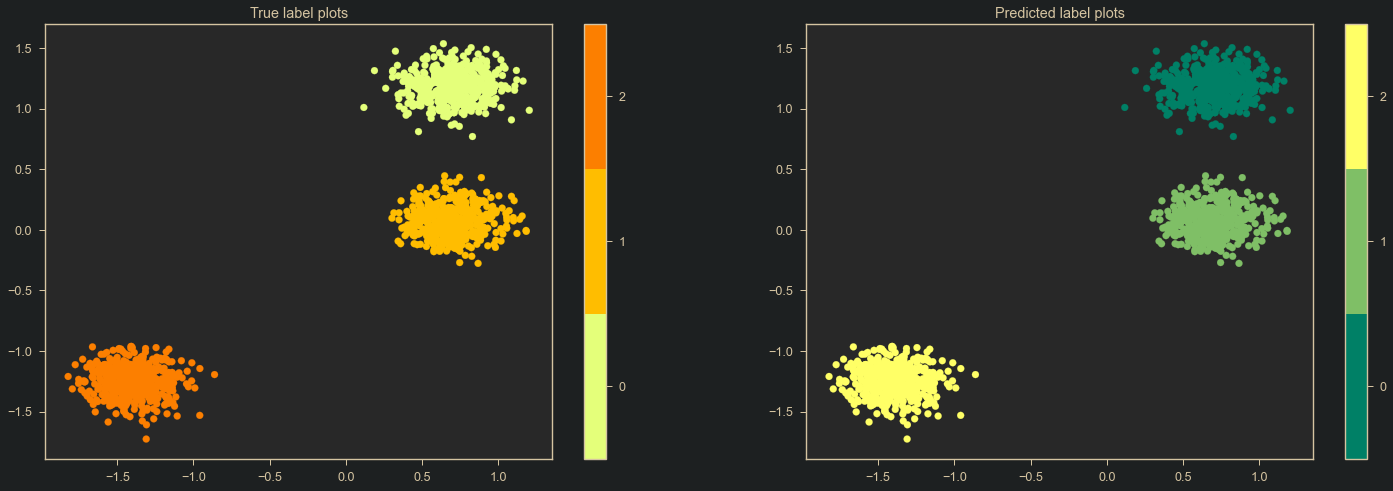

In [4]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0);

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500;
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05);
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05);
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8);
no_structure = np.random.rand(n_samples, 2), None;

# Anisotropicly distributed data
random_state = 170;
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state);
transformation = [[0.6, -0.6], [-0.4, 0.8]];
X_aniso = np.dot(X, transformation);
aniso = (X_aniso, y);

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state);

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 13));
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
#                     hspace=.01);

# plot_num = 1;

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1};

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
#     (no_structure, {})
];

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy();
    params.update(algo_params);
    X, y = dataset;
    X = StandardScaler().fit_transform(X);
    y_pred = NB_class(X,y);
    compare_plot(X,y,y_pred);
    # print(X.shape,y.shape,y_pred.shape)

In [5]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy();
    params.update(algo_params);
    X, y = dataset;
    X = StandardScaler().fit_transform(X);
    y_pred = NB_class(X,y);
    print(i_dataset+1,'\n');
    print(confusion_matrix(y,y_pred),'\n');
    print(classification_report(y,y_pred))

1 

[[750   0]
 [  0 750]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

2 

[[661  89]
 [ 88 662]] 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       750
           1       0.88      0.88      0.88       750

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

3 

[[495   5   0]
 [  7 489   4]
 [  0   1 499]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.99      0.98      0.98       500
           2       0.99      1.00      1.00       500

    accuracy      

Eigen vectos are (along rows):
 [[ 0.76016825 -0.64972628]
 [ 0.64972628  0.76016825]]
Eigenvalues: [6.45446818 0.61799556]


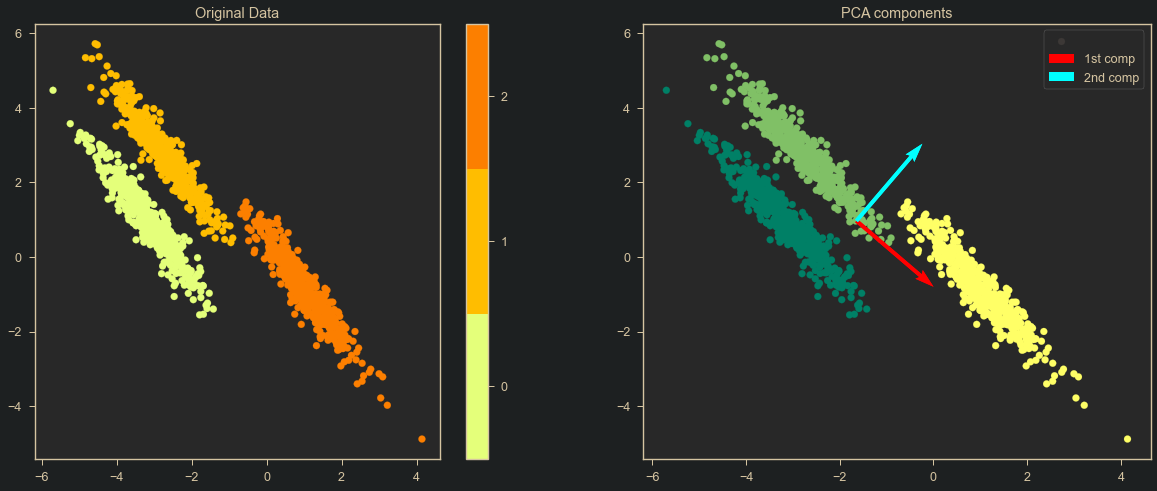

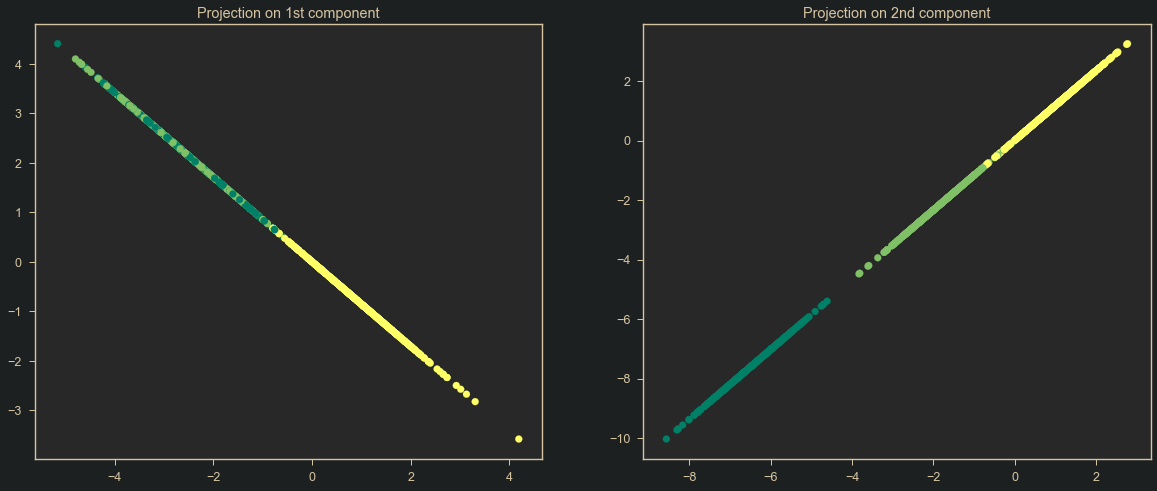

In [6]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0);

#GENERATING DATA
n_samples = 1500;
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8);
# Anisotropicly distributed data
random_state = 170;
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state);
transformation = [[0.6, -0.6], [-0.4, 0.8]];
X_aniso = np.dot(X, transformation);

#PLOTTING DATA
plt.figure(figsize=(20,8));
plt.subplot(1,2,1);
cmap = plt.cm.Wistia
normi = colors.BoundaryNorm(np.arange(np.min(y)-0.5, np.max(y)+1, 1), cmap.N)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y));
plt.title('Original Data');

#PCA
cov = np.cov(X_aniso.T);
# print("Covariance Matrix:\n",cov)
eig_vals, eig_vecs = np.linalg.eig(cov);
eig_vecs = eig_vecs.T;
eigen_values_sorted = np.argsort(eig_vals);
max_eig = eigen_values_sorted[1];
min_eig = eigen_values_sorted[0];
print("Eigen vectos are (along rows):\n",eig_vecs)
# print("Max EigenValue:",eig_vecs[max_eig])
print('Eigenvalues:',eig_vals)

#PLOT PCA COMP
plt.subplot(1,2,2);
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y,cmap='summer');
plt.quiver([np.mean(X_aniso[:,0]),np.mean(X_aniso[:,0])],[np.mean(X_aniso[:,1]),np.mean(X_aniso[:,1])], eig_vecs[max_eig,0],eig_vecs[max_eig,1],color=['red'],scale=5);
plt.quiver([np.mean(X_aniso[:,0]),np.mean(X_aniso[:,0])],[np.mean(X_aniso[:,1]),np.mean(X_aniso[:,1])], eig_vecs[min_eig,0],eig_vecs[min_eig,1],color=['cyan'],scale=5);
plt.title('PCA components');
plt.legend(['','1st comp','2nd comp']);

#PLOT PROJECTION
plt.figure(figsize=(20,8));
plt.subplot(1,2,1);
proj1 = np.dot(X,eig_vecs[max_eig,:]);
proj1 = np.reshape(proj1,(1500,1));
X1 = proj1*eig_vecs[max_eig,:];
plt.scatter(X1[:,0],X1[:,1],c=y,cmap='summer');
plt.title('Projection on 1st component');
plt.subplot(1,2,2);
proj2 = np.dot(X,eig_vecs[min_eig,:]);
proj2 = np.reshape(proj2,(1500,1));
X2 = proj2*eig_vecs[min_eig,:];
plt.scatter(X2[:,0],X2[:,1],c=y,cmap='summer');
plt.title('Projection on 2nd component');

Confusion matrix:
 [[252 244   4]
 [207 293   0]
 [  4   0 496]] 

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       500
           1       0.55      0.59      0.57       500
           2       0.99      0.99      0.99       500

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



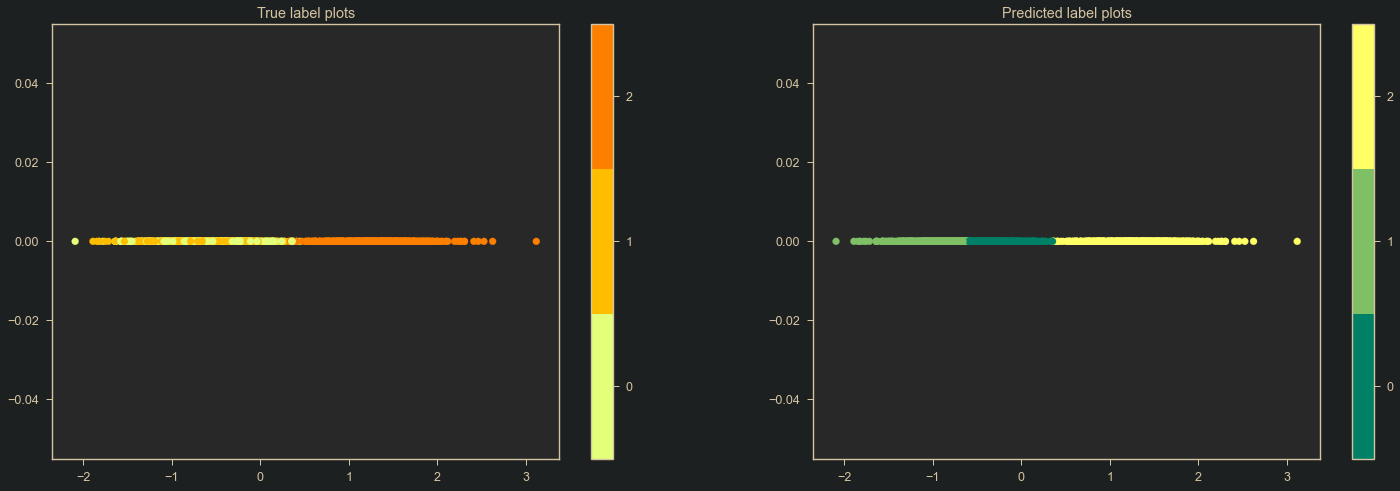

In [7]:
X = StandardScaler().fit_transform(proj1);
y_pred = NB_class(X,y);

plt.figure(figsize=(25,8));
plt.subplot(1,2,1);
cmap = plt.cm.Wistia
normi = colors.BoundaryNorm(np.arange(np.min(y)-0.5, np.max(y)+1, 1), cmap.N)
plt.scatter(X[:],np.zeros(X.shape),c=y,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y));
plt.title("True label plots");
plt.subplot(1,2,2);
cmap = plt.cm.summer
normi = colors.BoundaryNorm(np.arange(np.min(y_pred)-0.5, np.max(y_pred)+1, 1), cmap.N)
plt.scatter(X[:],np.zeros(X.shape),c=y_pred,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y_pred));
plt.title("Predicted label plots");

print("Confusion matrix:\n",confusion_matrix(y,y_pred),'\n');
print(classification_report(y,y_pred));

Confusion matrix:
 [[500   0   0]
 [  0 494   6]
 [  0   6 494]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.99      0.99       500
           2       0.99      0.99      0.99       500

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



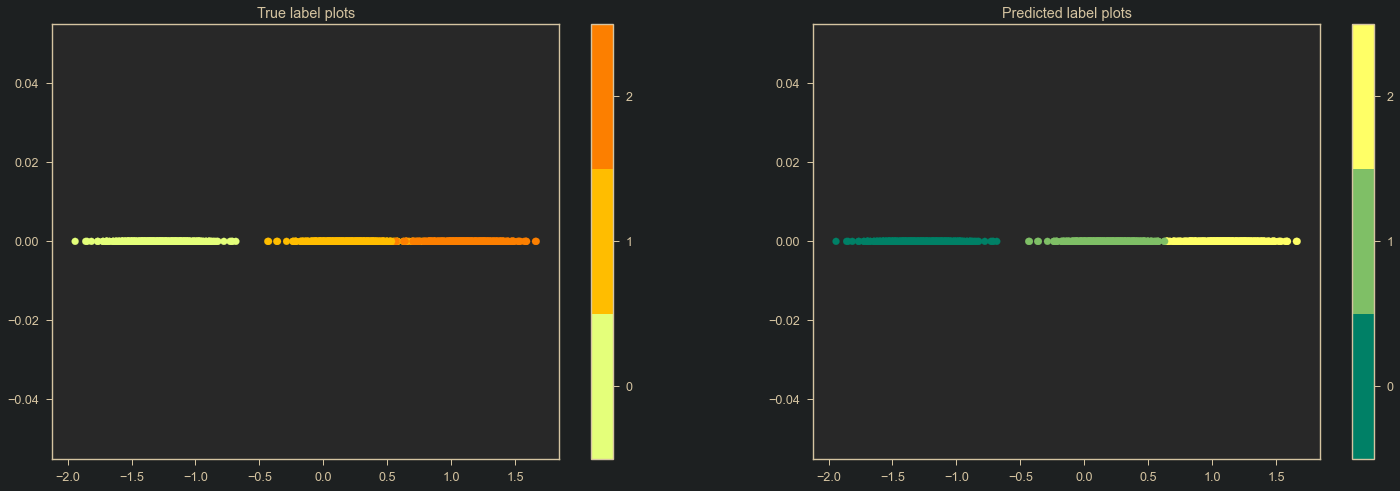

In [8]:
X = StandardScaler().fit_transform(proj2);
y_pred = NB_class(X,y);

plt.figure(figsize=(25,8));
plt.subplot(1,2,1);
cmap = plt.cm.Wistia
normi = colors.BoundaryNorm(np.arange(np.min(y)-0.5, np.max(y)+1, 1), cmap.N)
plt.scatter(X[:],np.zeros(X.shape),c=y,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y));
plt.title("True label plots");
plt.subplot(1,2,2);
cmap = plt.cm.summer
normi = colors.BoundaryNorm(np.arange(np.min(y_pred)-0.5, np.max(y_pred)+1, 1), cmap.N)
plt.scatter(X[:],np.zeros(X.shape),c=y_pred,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y_pred));
plt.title("Predicted label plots");

print("Confusion matrix:\n",confusion_matrix(y,y_pred),'\n');
print(classification_report(y,y_pred));

()


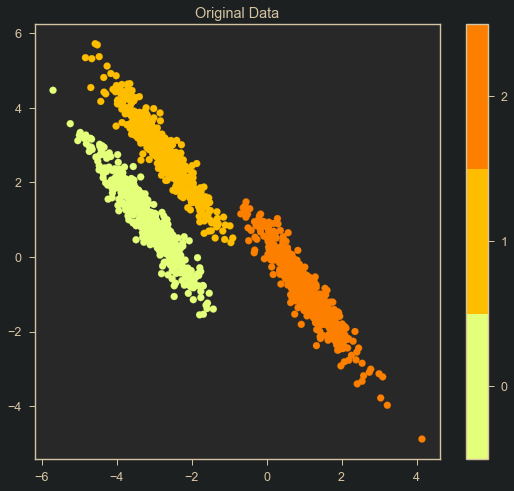

In [9]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0);

#GENERATING DATA
n_samples = 1500;
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8);
# Anisotropicly distributed data
random_state = 170;
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state);
transformation = [[0.6, -0.6], [-0.4, 0.8]];
X_aniso = np.dot(X, transformation);

#PLOTTING DATA
plt.figure(figsize=(20,8));
plt.subplot(1,2,1);
cmap = plt.cm.Wistia
normi = colors.BoundaryNorm(np.arange(np.min(y)-0.5, np.max(y)+1, 1), cmap.N)
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y,cmap=cmap,norm=normi);
plt.colorbar(ticks=np.unique(y));
plt.title('Original Data');

#LDA
#mean of features
X_mean=np.mean(X,axis=0,keepdims=True);
P1 = np.mean(X[np.where(y==0)]);
P2 = np.mean(X[np.where(y==1)]);
P3 = np.mean(X[np.where(y==2)]);
print(P1.shape);
#within the class scatter matrix
Sw = (X-X_mean).T@(X-X_mean)
# print(Sw.shape)
#class scatter matrix
# Sb=(P1_mean-P2_mean)@(P1_mean-P2_mean).T

# for i in np.arange(1,X.shape[1]):
    

# #PLOT LDA COMP
# plt.subplot(1,2,2);
# plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y,cmap='summer');
# plt.quiver([0,0],[0,0], eig_vecs[max_eig,0],eig_vecs[max_eig,1],color=['red'],scale=5);
# plt.quiver([0,0],[0,0], eig_vecs[min_eig,0],eig_vecs[min_eig,1],color=['cyan'],scale=5);
# plt.title('PCA components');
# plt.legend(['','1st comp','2nd comp']);

# #PLOT PROJECTION
# plt.figure(figsize=(20,8));
# plt.subplot(1,2,1);
# proj1 = np.dot(X,eig_vecs[max_eig,:]);
# proj1 = np.reshape(proj1,(1500,1));
# X1 = proj1*eig_vecs[max_eig,:];
# plt.scatter(X1[:,0],X1[:,1],c=y,cmap='summer');
# plt.title('Projection on 1st component');
# plt.subplot(1,2,2);
# proj2 = np.dot(X,eig_vecs[min_eig,:]);
# proj2 = np.reshape(proj2,(1500,1));
# X2 = proj2*eig_vecs[min_eig,:];
# plt.scatter(X2[:,0],X2[:,1],c=y,cmap='summer');
# plt.title('Projection on 2nd component');